In [1]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 4.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=9ba9ecb5dec47ce7d9d0af7d4df97264189577cd6ffbcd0249009463bde78a2c
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions

#input
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
#output
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
service.automf(3)
quality.automf(3)

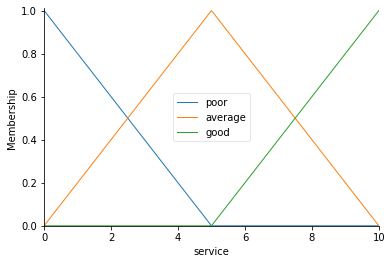

In [ ]:
service.view()

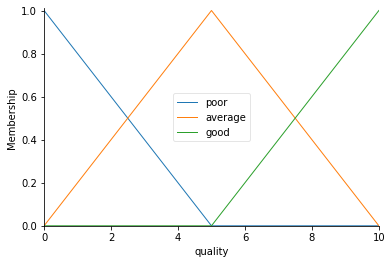

In [ ]:
quality.view()

In [4]:
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

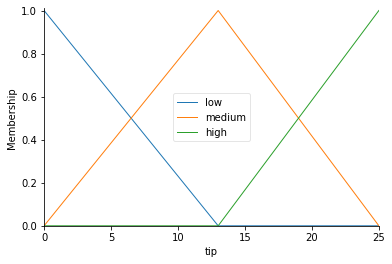

In [5]:
tip.view()

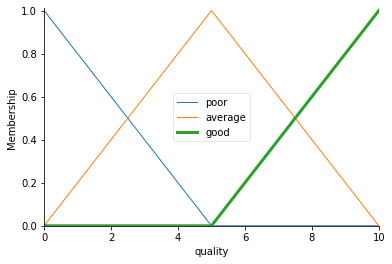

In [ ]:
# You can see how these look with .view()
quality['good'].view()

In [7]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

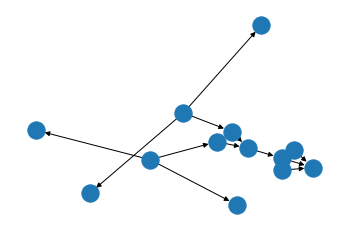

In [8]:
rule1.view();

In [9]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [10]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [13]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['service'] = 1
tipping.input['quality'] = 10

# Crunch the numbers
tipping.compute()

12.591611904905447


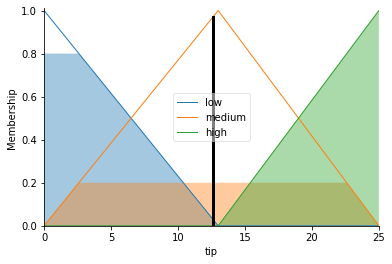

In [14]:
print(tipping.output['tip'])
tip.view(sim=tipping)